In [1]:
#LINEAR ALGEBRA
import numpy as np
#DATA PROCESSING, CSV FILE I/Od
import pandas as pd
#DATA VISUALIZATION LIBRARY
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
color = sns.color_palette()
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## **SETTING UP DATASET**

In [2]:
data = pd.read_csv("../input/breast-cancer-prediction/data.csv")
data

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## **DATA ANALYSIS & PREPROCESSING(Implementing Different Methods for higher accuracy)**

In [3]:
data.columns


Index(['id', 'diagnosis', 'Radius_mean', 'Texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
#using tuple 
data.shape

(569, 32)

In [5]:
#counting the number of missing values (or null values) in each column
data.isna().sum()

id                         0
diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
data.describe()

,id,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.296678,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301816,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.870000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
#'B' represents Benign Cancer & 'M' represents Malignant Cancer
set(data.diagnosis.values.tolist())

{'B', 'M'}

In [9]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
#Mean values of various features computed for Breast cells(to fill these mean values instead of null ones, if present) 
data.groupby('diagnosis').mean()

,id,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.623774,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


## **GRAPHICAL REPRESENTATIONS**

In [11]:
#Y INCLUDES OUR LABELS AND X INCLUDES OUR FEATURES
Y = data.diagnosis                         
list = ['id','diagnosis']
X= data.drop(list,axis = 1 )
X.head()
Y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [12]:
Y_encoded = pd.get_dummies(Y, prefix='', prefix_sep='') #converting into dummy variables
#Seaborn expects/reads numerical values to determine the position and width of the bars in the bar graph
#Therefore, replacing 'B' and 'M' with 0 and 1, respectively for graphical representation
Y_encoded= Y_encoded.replace({'B': 0, 'M': 1})
Y_encoded.value_counts()

B      M    
True   False    357
False  True     212
Name: count, dtype: int64

Number of Benign Cancer:  357
Number of Malignant Cancer:  212


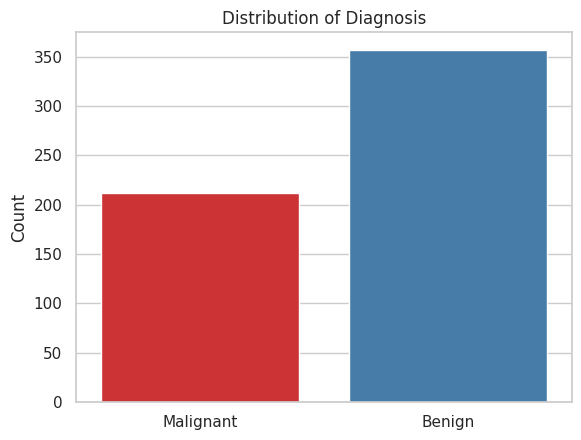

In [13]:

# plotting benign and malignant cases BUT, showing the critical cases first(Malignant first and then benign) i.e., shown in reverse order
sns.set(style="whitegrid")
ax = sns.countplot(x=Y_encoded.iloc[:,1], palette="Set1", order=Y_encoded.iloc[:,1].value_counts().index[::-1])  #The [::-1] syntax is used to reverse the order of the categories
ax.set_xticklabels(['Malignant', 'Benign'])
ax.set_xlabel('') #to remove the label of the x-axis from the plot.
ax.set_ylabel('Count')
ax.set_title('Distribution of Diagnosis')
B,M = Y_encoded.value_counts()
print('Number of Benign Cancer: ',B)
print('Number of Malignant Cancer: ',M)


## **TRAIN-TEST-SPLIT**

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
Y_train_num = Y_train.copy()
Y_test_num = Y_test.copy()
# use the map() function to replace 'B' with 0 and 'M' with 1
Y_train_num = Y_train_num.map({'B': 0, 'M': 1})
Y_test_num = Y_test_num.map({'B': 0, 'M': 1})

## **MODEL TRAINING**

In [18]:
#importing all the models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## **Model Evaluation for Accuracy Score**

## **LOGISTIC REGRESSION**


In [19]:
from sklearn.preprocessing import StandardScaler
#Feature scaling is a preprocessing step used to standardize the range of feature values in a dataset. 
#In other words, feature scaling transforms the data so that the features have similar ranges, which can help improve the performance of many machine learning algorithms.
#Feature scaling is a technique used to make sure that all the input features in a dataset have similar ranges of values, so that they don't affect the machine learning model in different ways.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# using the map() function to replace 'B' with 0 and 'M' with 1
Y_train_num = Y_train.map({'B': 0, 'M': 1})

#training the Logistic Regression model using Training Data
#binary classification using logistic regression
lr = LogisticRegression(penalty='l2', C=0.1)
lr.fit(X_train, Y_train_num)

X_train_prediction = lr.predict(X_train)   #predicts the binary class labels for the input training data
X_train_prediction = (X_train_prediction > 0.5).astype(int)

training_data_accuracy = accuracy_score(Y_train_num, X_train_prediction)
print("Accuracy on the training data:",training_data_accuracy)

Accuracy on the training data: 0.9846153846153847


In [20]:
#accuracy on test data
X_test_prediction= lr.predict(X_test)
test_data_accuracy= accuracy_score(Y_test_num, X_test_prediction)
print("Accuracy on the test data:",test_data_accuracy)

Accuracy on the test data: 0.9736842105263158


## **SVM (Support Vector Machine)** 

In [21]:
#SVM(Support Vector Machine) is a popular algorithm used in machine learning for classification and regression analysis. 
#It is a supervised learning model that can be used for both binary and multiclass classification.
from sklearn.svm import SVC

In [22]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, Y_train_num)

In [23]:
#Precision is the proportion of true positives (correctly predicted instances of class 1) out of all predicted instances of class 1. The precision for class 0 is 0.99 and for class 1 is 0.94. This means that 99% of the instances predicted as class 0 were actually class 0, while 94% of the instances predicted as class 1 were actually class 1.
#Recall is the proportion of true positives out of all actual instances of a class. The recall for class 0 is 0.96 and for class 1 is 0.98. This means that 96% of the actual instances of class 0 were correctly identified by the model, and 98% of the actual instances of class 1 were correctly identified by the model.
#F1-score is the harmonic mean of precision and recall, which balances the two metrics. The F1-score for class 0 is 0.97 and for class 1 is 0.96.
#Support is the number of actual instances of each class in the dataset. There were 69 instances of class 0 and 45 instances of class 1.
#Accuracy is the proportion of correct predictions out of all predictions made by the model. The overall accuracy of the model is 0.96.
Y_pred = svm_model.predict(X_test)
print(classification_report(Y_test_num, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        69
           1       0.94      0.98      0.96        45

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



## **kNN (K-Nearest Neighbors classification model)**

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
#n_neighbors is set to 5, it means that the algorithm will consider the 5 nearest neighbours of a data point when making a prediction.
knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train, Y_train_num)

KNeighborsClassifier()

In [26]:
knn_pred = knn_model.predict(X_test)
print(classification_report(Y_test_num, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        69
           1       0.94      0.98      0.96        45

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [27]:
df_combined = pd.DataFrame({
    'logreg_prediction': X_test_prediction,
    'knn_prediction': knn_pred,
    'svm_prediction': Y_pred
})

# Use mode to get the majority vote
df_combined['final_prediction'] = df_combined.mode(axis=1)[0]

# Create confusion matrix
conf_matrix = confusion_matrix(Y_test_num, df_combined['final_prediction'])
print("Confusion Matrix:\n", conf_matrix)

print(classification_report(Y_test_num,df_combined['final_prediction'] ))

Confusion Matrix:
 [[69  0]
 [ 3 42]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        69
           1       1.00      0.93      0.97        45

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## **Building a Predictive System**

In [28]:
input_data= (13.08,15.71,85.63,520,0.1075,0.127,0.04568,0.0311,0.1967,0.06811,0.1852,0.7477,1.383,14.67,0.004097,0.01898,0.01698,0.00649,0.01678,0.002425,14.5,20.49,96.09,630.5,0.1312,0.2776,0.189,0.07283,0.3184,0.08183)
#changing this data to a numpy array
input_arr= np.asarray(input_data)
#reshaping it into 2D array for taking an ML model input
reshape_arr= input_arr.reshape(1,-1)
Pred_01=lr.predict(reshape_arr)
Pred_02=svm_model.predict(reshape_arr)
Pred_03=knn_model.predict(reshape_arr)
final_prediction=(Pred_01 + Pred_02 + Pred_03)/3

print(final_prediction)
if(final_prediction<0.5):
  print("The case is Benign!")
else:
   print("The case is Malignant!")


[1.]
The case is Malignant!
